Epoch 0: Loss = 156.0968
Epoch 10: Loss = 0.9235
Epoch 20: Loss = 0.9195
Epoch 30: Loss = 0.9160
Epoch 40: Loss = 0.9127
Epoch 50: Loss = 0.9098
Epoch 60: Loss = 0.9072
Epoch 70: Loss = 0.9048
Epoch 80: Loss = 0.9027
Epoch 90: Loss = 0.9008

Mean Absolute Error on Test Data: 0.5777

Predictions for new inputs:
X = 12.0, Predicted Y = 25.3341
X = 15.0, Predicted Y = 31.5482
X = 18.0, Predicted Y = 37.7623


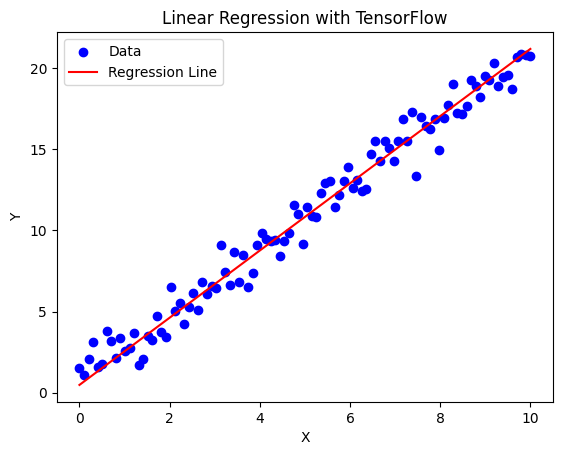

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 100)
Y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=39)

# Define a linear regression model
class LinearRegressionModel(tf.Module):
    def __init__(self):
        # Initialize weight (w) and bias (b) as trainable variables
        self.w = tf.Variable(0.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)  # Stochastic Gradient Descent

# Training loop
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Make predictions
        predictions = model(X_train)
        # Calculate the loss
        loss = loss_fn(Y_train, predictions)

    # Compute gradients and update weights
    gradients = tape.gradient(loss, [model.w, model.b])
    optimizer.apply_gradients(zip(gradients, [model.w, model.b]))

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.4f}")

# Evaluate the model
predictions_test = model(X_test)
mae = tf.reduce_mean(tf.abs(Y_test - predictions_test))
print(f"\nMean Absolute Error on Test Data: {mae.numpy():.4f}")

# Make predictions for new data
X_new = np.array([12, 15, 18], dtype=np.float32)
predictions_new = model(X_new)

print("\nPredictions for new inputs:")
for i, x in enumerate(X_new):
    print(f"X = {x}, Predicted Y = {predictions_new[i].numpy():.4f}")

# Plot the data and the regression line
plt.scatter(X, Y, label="Data", color="blue")
plt.plot(X, model(X), label="Regression Line", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression with TensorFlow")
plt.show()


=== Diabetes Dataset ===
X (BMI, first 5): [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
Y (Disease Progression, first 5): [151.  75. 141. 206. 135.] 

=== Training Data ===
X_train (first 5): [ 0.11127556 -0.03315126 -0.00081689 -0.03315126 -0.0374625 ]
Y_train (first 5): [336. 214. 113. 168. 128.] 

=== Testing Data ===
X_test (first 5): [ 0.01427248  0.03151747 -0.01590626  0.04013997  0.0519959 ]
Y_test (first 5): [118. 296. 132. 180. 230.] 

=== Training the Model ===
Epoch 0: Loss = 28906.7188
Epoch 20: Loss = 5975.3809
Epoch 40: Loss = 5934.5542
Epoch 60: Loss = 5897.4580
Epoch 80: Loss = 5861.0376

=== Evaluation on Test Set ===
Mean Absolute Error (MAE): 62.05

=== Predictions on New BMI Data ===
Input BMI = 0.029999999329447746, Predicted Progression = 152.62
Input BMI = 0.05000000074505806, Predicted Progression = 153.48
Input BMI = 0.07000000029802322, Predicted Progression = 154.34


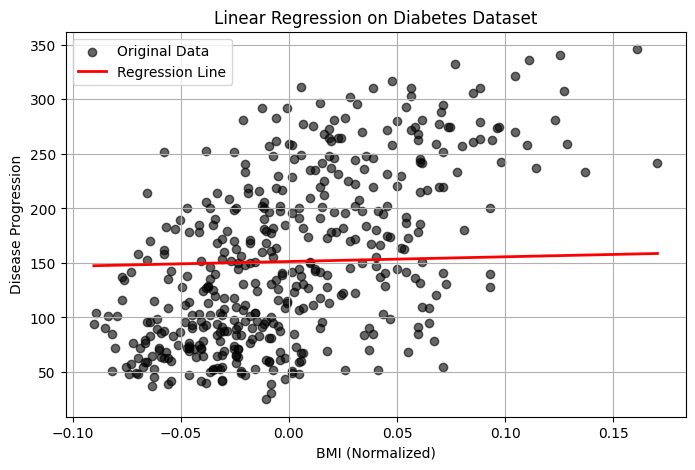

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Step 2: Set Seeds for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Step 3: Load the Diabetes Dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Use BMI feature (3rd column)
Y = diabetes.target      # Target is a quantitative measure of disease progression

# Print the first few values
print("=== Diabetes Dataset ===")
print("X (BMI, first 5):", X[:5])
print("Y (Disease Progression, first 5):", Y[:5], '\n')

# Step 4: Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=39)

print("=== Training Data ===")
print("X_train (first 5):", X_train[:5])
print("Y_train (first 5):", Y_train[:5], '\n')

print("=== Testing Data ===")
print("X_test (first 5):", X_test[:5])
print("Y_test (first 5):", Y_test[:5], '\n')

# Step 5: Define the Linear Regression Model
class LinearRegressionModel(tf.Module):
    def __init__(self):
        self.w = tf.Variable(0.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

# Instantiate the model
model = LinearRegressionModel()

# Step 6: Define Loss Function and Optimizer
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent

# Step 7: Train the Model
print("=== Training the Model ===")
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(X_train) # Make prediction
        loss = loss_fn(Y_train, predictions) # Calculate Loss
    # Compute gradients and update weights
    gradients = tape.gradient(loss, [model.w, model.b])
    optimizer.apply_gradients(zip(gradients, [model.w, model.b]))

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.4f}")

# Step 8: Evaluate the Model on Test Set
predictions_test = model(X_test)
mae = tf.reduce_mean(tf.abs(Y_test - predictions_test))
print("\n=== Evaluation on Test Set ===")
print(f"Mean Absolute Error (MAE): {mae.numpy():.2f}")

# Step 9: Predict on New Data (example BMI values)
X_new = np.array([0.03, 0.05, 0.07], dtype=np.float32)
predictions_new = model(X_new)

print("\n=== Predictions on New BMI Data ===")
for i, x in enumerate(X_new):
    print(f"Input BMI = {x}, Predicted Progression = {predictions_new[i].numpy():.2f}")

# Step 10: Plot the Regression Line and Data
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Original Data", color="black", alpha=0.6)
X_sorted = np.sort(X)
plt.plot(X_sorted, model(X_sorted).numpy(), label="Regression Line", color="red", linewidth=2)
plt.xlabel("BMI (Normalized)")
plt.ylabel("Disease Progression")
plt.title("Linear Regression on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()